<a href="https://colab.research.google.com/github/prabal5ghosh/research-project-on-physics-informed-machine-learning-on-transcriptomics-data/blob/main/pysindy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!pip install torchdiffeq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 76.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 58.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 87.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [1]:
!pip install pysindy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.0/121.0 kB 3.8 MB/s eta 0:00:00


Original Data:
        Gene     Day1     Day2     Day4
0  AT5G40100 -0.44796 -0.56015 -5.09196
1  AT1G06930  1.77836  0.00000  0.00000
2  AT1G04470  0.00000  1.17515  0.00000
3  AT5G66730  0.05537  0.09843 -0.10176

ODE model for Gene AT5G40100:
(x0)' = 0.293 1 + 0.788 x0
Parameters (coefficients):
[[0.29312925 0.78777502 0.        ]]
Feature names:
['1', 'x0', 'x0^2']
Constructed ODE:
x' = 0.293*1 + 0.788*x0
Original datapoints:
[-0.44796 -0.56015 -5.09196]
Predictions at original time points:
[-0.05976244 -0.14814292 -3.71818963]


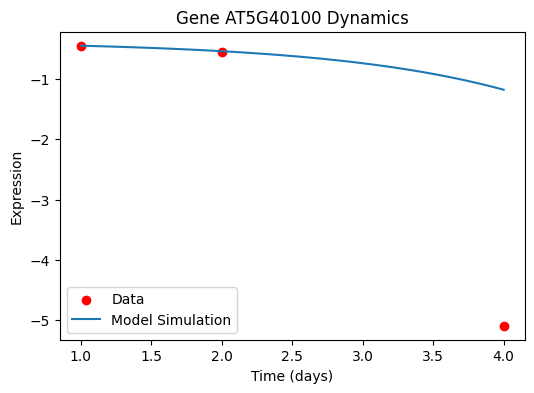


ODE model for Gene AT1G06930:
(x0)' = -0.320 x0 + -0.570 x0^2
Parameters (coefficients):
[[ 0.         -0.32031537 -0.56963605]]
Feature names:
['1', 'x0', 'x0^2']
Constructed ODE:
x' = -0.320*x0 + -0.570*x0^2
Original datapoints:
[1.77836 0.      0.     ]
Predictions at original time points:
[-2.37114667  0.          0.        ]


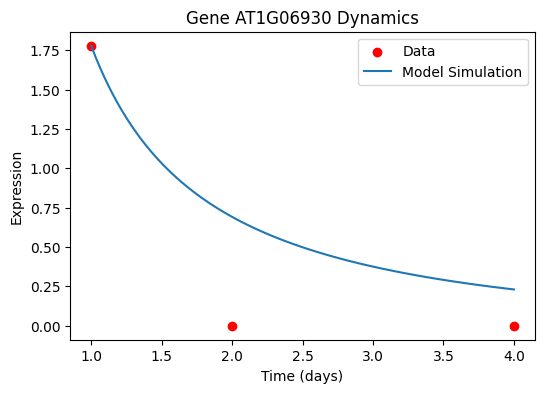


ODE model for Gene AT1G04470:
(x0)' = 0.210 x0 + 0.247 x0^2
Parameters (coefficients):
[[0.         0.20999778 0.24677889]]
Feature names:
['1', 'x0', 'x0^2']
Constructed ODE:
x' = 0.210*x0 + 0.247*x0^2
Original datapoints:
[0.      1.17515 0.     ]
Predictions at original time points:
[0.       0.587575 0.      ]


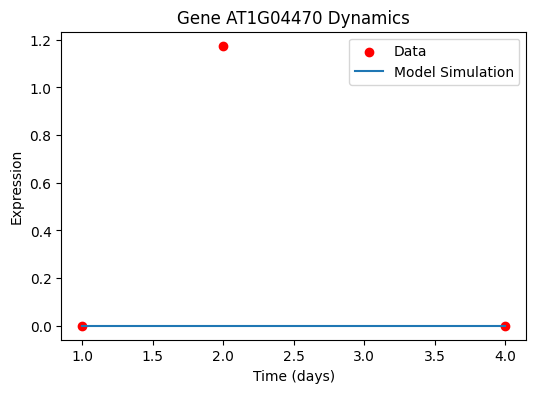


ODE model for Gene AT5G66730:
(x0)' = 1.059 x0
Parameters (coefficients):
[[0.         1.05866788 0.        ]]
Feature names:
['1', 'x0', 'x0^2']
Constructed ODE:
x' = 1.059*x0
Original datapoints:
[ 0.05537  0.09843 -0.10176]
Predictions at original time points:
[ 0.05861844  0.10420468 -0.10773004]


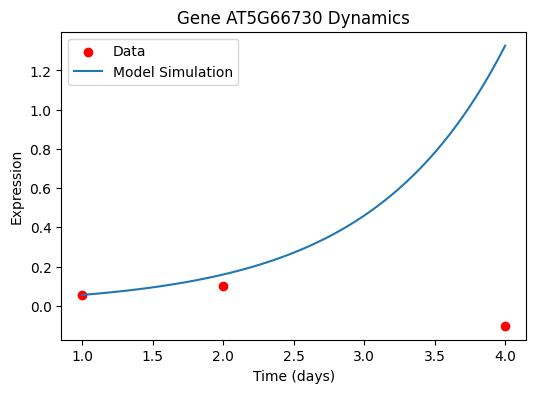

In [8]:
import numpy as np
import pandas as pd
import pysindy as ps
import matplotlib.pyplot as plt

# Define the dataset
data = {
    "Gene": ["AT5G40100", "AT1G06930", "AT1G04470", "AT5G66730"],
    "Day1":  [-0.44796,    1.77836,     0.0,         0.05537],
    "Day2":  [-0.56015,    0.0,         1.17515,     0.09843],
    "Day4":  [-5.09196,    0.0,         0.0,        -0.10176],
}
df = pd.DataFrame(data)
print("Original Data:")
print(df)

# Create time points array corresponding to Day1, Day2, Day4
time_points = np.array([1.0, 2.0, 4.0])

# Extract gene expression values (each row corresponds to one gene's time series)
gene_data = df[["Day1", "Day2", "Day4"]].values

# Create a SINDy model instance with a polynomial library up to degree 2 and STLSQ optimizer.
model = ps.SINDy(feature_library=ps.PolynomialLibrary(degree=2),
                 optimizer=ps.STLSQ(threshold=0.1))

# Loop over each gene's time series, fit the model, print predictions, parameters, and ODEs
for i, gene_ts in enumerate(gene_data):
    # Reshape the time series to (n_samples, n_features)
    gene_ts = gene_ts.reshape(-1, 1)
    model.fit(gene_ts, t=time_points)

    print(f"\nODE model for Gene {df.loc[i, 'Gene']}:")
    # Print the discovered ODE model
    model.print()

    # Extract coefficients (parameters) and feature names
    coefficients = model.coefficients()
    feature_names = model.get_feature_names()
    print("Parameters (coefficients):")
    print(coefficients)
    print("Feature names:")
    print(feature_names)

    # Construct and print a human-readable ODE equation
    # For a 1D system, coefficients[0] holds the coefficients for the single equation.
    ode_eqn = ""
    for coeff, name in zip(coefficients[0], feature_names):
        # Print only terms with non-negligible coefficients
        if np.abs(coeff) > 1e-4:
            ode_eqn += f"{coeff:.3f}*{name} + "
    # Remove the trailing " + " if present
    if ode_eqn:
        ode_eqn = ode_eqn.rstrip(" + ")
    print("Constructed ODE:")
    print(f"x' = {ode_eqn}")

    # Predict using the original time points
    predictions = model.predict(gene_ts)
    print("Original datapoints:")
    print(gene_ts.flatten())
    print("Predictions at original time points:")
    print(predictions.flatten())

    # Generate predictions on a dense time grid for better visualization
    t_dense = np.linspace(time_points[0], time_points[-1], 100)
    # Pass the first row (a 1D array) as the initial condition
    sim_data = model.simulate(gene_ts[0], t_dense)

    # Plotting the original data and the model simulation
    plt.figure(figsize=(6, 4))
    plt.scatter(time_points, gene_ts, color='red', label='Data')
    plt.plot(t_dense, sim_data, label='Model Simulation')
    plt.title(f"Gene {df.loc[i, 'Gene']} Dynamics")
    plt.xlabel("Time (days)")
    plt.ylabel("Expression")
    plt.legend()
    plt.show()


In [3]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Example dataset
data = {
    "Gene": ["AT5G40100", "AT1G06930", "AT1G04470", "AT5G66730"],
    "Day1":  [-0.44796,    1.77836,     0.0,         0.05537],
    "Day2":  [-0.56015,    0.0,         1.17515,     0.09843],
    "Day4":  [-5.09196,    0.0,         0.0,        -0.10176],
}
df = pd.DataFrame(data)
gene_data = df[["Day1", "Day2", "Day4"]].values
time_points = np.array([1.0, 2.0, 4.0])

# Compute derivatives using quadratic fit for each gene
derivatives = []
for i in range(gene_data.shape[0]):
    y = gene_data[i, :]
    # Design matrix for quadratic fit: t^2, t, 1
    A = np.vstack([time_points**2, time_points, np.ones(3)]).T
    coeffs = np.linalg.lstsq(A, y, rcond=None)[0]
    a, b, c = coeffs
    # Compute derivatives: dy/dt = 2a*t + b
    dy_dt = 2 * a * time_points + b
    derivatives.append(dy_dt)
derivatives = np.array(derivatives)

# Discover ODEs using Lasso regression
ode_equations = []
for i in range(gene_data.shape[0]):
    y = gene_data[i, :]
    dy_dt = derivatives[i, :]

    # Create feature matrix [1, y, y^2, y^3]
    Theta = np.hstack([np.ones((3, 1)), y.reshape(-1, 1), y.reshape(-1, 1)**2, y.reshape(-1, 1)**3])

    # Standardize features (except intercept)
    scaler = StandardScaler(with_mean=False)
    Theta_scaled = Theta.copy()
    Theta_scaled[:, 1:] = scaler.fit_transform(Theta[:, 1:])
    scale = scaler.scale_

    # Apply Lasso regression
    alpha = 0.1  # Regularization strength (may require adjustment)
    lasso = Lasso(alpha=alpha, fit_intercept=False, max_iter=10000)
    lasso.fit(Theta_scaled, dy_dt)

    # Rescale coefficients to original feature scales
    coeffs_scaled = lasso.coef_
    coeffs = np.zeros(4)
    coeffs[0] = coeffs_scaled[0]
    if len(scale) >= 1 and scale[0] != 0:
        coeffs[1] = coeffs_scaled[1] / scale[0]
    if len(scale) >= 2 and scale[1] != 0:
        coeffs[2] = coeffs_scaled[2] / scale[1]
    if len(scale) >= 3 and scale[2] != 0:
        coeffs[3] = coeffs_scaled[3] / scale[2]

    # Build the ODE equation string
    terms = []
    tolerance = 1e-3  # Threshold to consider a term as non-zero
    if abs(coeffs[0]) > tolerance:
        terms.append(f"{coeffs[0]:.3f}")
    if abs(coeffs[1]) > tolerance:
        terms.append(f"{coeffs[1]:.3f}*y")
    if abs(coeffs[2]) > tolerance:
        terms.append(f"{coeffs[2]:.3f}*y^2")
    if abs(coeffs[3]) > tolerance:
        terms.append(f"{coeffs[3]:.3f}*y^3")
    equation = "dy/dt = " + " + ".join(terms).replace("+ -", "- ") if terms else "dy/dt = 0"
    ode_equations.append(equation)

# Display results
for gene, eq in zip(df['Gene'], ode_equations):
    print(f"Gene {gene}: {eq}")

Gene AT5G40100: dy/dt = 0.478*y - 0.043*y^2
Gene AT1G06930: dy/dt = -1.254*y
Gene AT1G04470: dy/dt = 0.380*y
Gene AT5G66730: dy/dt = -3.822*y^2


In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchdiffeq import odeint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---------------------------
# 1. Prepare the Data
# ---------------------------
# Define the dataset: each gene has measurements at Day1, Day2, and Day4
data = {
    "Gene": ["AT5G40100", "AT1G06930", "AT1G04470", "AT5G66730"],
    "Day1":  [-0.44796,    1.77836,     0.0,         0.05537],
    "Day2":  [-0.56015,    0.0,         1.17515,     0.09843],
    "Day4":  [-5.09196,    0.0,         0.0,        -0.10176],
}
df = pd.DataFrame(data)
print("Original Data:")
print(df)

# Ensure that the day columns are floats
df[["Day1", "Day2", "Day4"]] = df[["Day1", "Day2", "Day4"]].astype(float)

# Time points (irregularly sampled) as a torch tensor
times = torch.tensor([1.0, 2.0, 4.0])

# Create a list of observation sequences (each sequence is of shape [seq_len, 1])
gene_observations = []
for i in range(df.shape[0]):
    # Convert the gene's measurements to a (3, 1) tensor with proper float conversion
    obs = torch.tensor(df.loc[i, ["Day1", "Day2", "Day4"]].to_numpy(dtype=np.float32)).unsqueeze(-1)
    gene_observations.append(obs)

# Verify the gene_observations
print(gene_observations)

# ---------------------------
# 2. Define the Latent ODE Model
# ---------------------------
# ODE function in latent space
class ODEFunc(nn.Module):
    def __init__(self, latent_dim, hidden_dim):
        super(ODEFunc, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(latent_dim, hidden_dim),
            nn.Tanh(),
            nn.Linear(hidden_dim, latent_dim)
        )

    def forward(self, t, z):
        return self.net(z)

# ODE-RNN cell: integrates latent dynamics then updates using a GRUCell
class ODERNNCell(nn.Module):
    def __init__(self, input_dim, hidden_dim, ode_func):
        super(ODERNNCell, self).__init__()
        self.ode_func = ode_func
        self.gru_cell = nn.GRUCell(input_dim, hidden_dim)

    def forward(self, delta_t, x, h):
        # Integrate the latent ODE from time 0 to delta_t starting at h
        # Check if delta_t is 0, if so, skip the ODE integration
        if delta_t == 0:
            h_ode = h
        else:
            t_span = torch.tensor([0.0, delta_t]).to(h)
            h_ode = odeint(self.ode_func, h, t_span)[-1]
        # Update with GRUCell using observation x
        h_new = self.gru_cell(x, h_ode)
        return h_new

# ODE-RNN Encoder: processes the sequence and returns a final latent state
class ODERNNEncoder(nn.Module):
    def __init__(self, input_dim, hidden_dim, ode_func):
        super(ODERNNEncoder, self).__init__()
        self.hidden_dim = hidden_dim
        self.ode_rnn_cell = ODERNNCell(input_dim, hidden_dim, ode_func)

    def forward(self, times, observations):
        # times: tensor of shape (seq_len,)
        # observations: tensor of shape (seq_len, input_dim)
        h = torch.zeros(1, self.hidden_dim).to(observations.device)
        last_time = times[0]
        for i, t in enumerate(times):
            delta_t = t - last_time
            # observation at time t, reshaped to (1, input_dim)
            x = observations[i].unsqueeze(0)
            h = self.ode_rnn_cell(delta_t, x, h)
            last_time = t
        return h  # final latent state

# Decoder: maps latent state back to observation space
class Decoder(nn.Module):
    def __init__(self, hidden_dim, output_dim):
        super(Decoder, self).__init__()
        self.net = nn.Linear(hidden_dim, output_dim)

    def forward(self, h):
        return self.net(h)

# Combine components into the full Latent ODE model
class LatentODEModel(nn.Module):
    def __init__(self, input_dim, latent_dim, hidden_dim_ode, decoder_output_dim):
        super(LatentODEModel, self).__init__()
        self.ode_func = ODEFunc(latent_dim, hidden_dim_ode)
        self.encoder = ODERNNEncoder(input_dim, latent_dim, self.ode_func)
        self.decoder = Decoder(latent_dim, decoder_output_dim)

    def forward(self, times, observations, pred_times):
        # Encode the observed sequence to get the initial latent state
        h0 = self.encoder(times, observations)
        outputs = []
        t0 = times[-1]
        # Predict (simulate) for each prediction time point starting from t0
        for t in pred_times:
            delta_t = t - t0
            t_span = torch.tensor([0.0, delta_t]).to(h0)
            h_t = odeint(self.ode_func, h0, t_span)[-1]
            x_t = self.decoder(h_t)
            outputs.append(x_t)
        outputs = torch.stack(outputs, dim=0)
        return outputs

# ---------------------------
# 3. Train the Latent ODE Model
# ---------------------------
input_dim = 1       # each observation is a scalar (gene expression)
latent_dim = 16     # latent state dimension
hidden_dim_ode = 32 # hidden dimension within the ODE function
decoder_output_dim = 1

model = LatentODEModel(input_dim, latent_dim, hidden_dim_ode, decoder_output_dim)
optimizer = optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.MSELoss()

# For simplicity, we train for reconstruction: we want the model to predict the observed points.
# In this toy example, we use the same times for input and prediction.
n_epochs = 100
for epoch in range(n_epochs):
    total_loss = 0.0
    for obs in gene_observations:
        optimizer.zero_grad()
        pred = model(times, obs, times)  # predict at the same time points
        loss = criterion(pred.squeeze(), obs.squeeze())
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    if epoch % 10 == 0:
        avg_loss = total_loss / len(gene_observations)
        print(f"Epoch {epoch}, Loss: {avg_loss:.4f}")

# ---------------------------
# 4. Visualize the Results
# ---------------------------
# For each gene, compare the model’s reconstruction to the actual data.
for i, obs in enumerate(gene_observations):
    model.eval()
    with torch.no_grad():
        # Predict on a dense time grid for better visualization
        pred_times = torch.linspace(times[0], times[-1], 100)
        pred = model(times, obs, pred_times)
    obs_np = obs.squeeze().cpu().numpy()
    pred_np = pred.squeeze().cpu().numpy()
    plt.figure(figsize=(6, 4))
    plt.scatter(times.cpu().numpy(), obs_np, color='red', label='Data')
    plt.plot(pred_times.cpu().numpy(), pred_np, label='Latent ODE Prediction')
    plt.title(f"Gene {df.loc[i, 'Gene']} Dynamics (Latent ODE)")
    plt.xlabel("Time (days)")
    plt.ylabel("Expression")
    plt.legend()
    plt.show()


Original Data:
        Gene     Day1     Day2     Day4
0  AT5G40100 -0.44796 -0.56015 -5.09196
1  AT1G06930  1.77836  0.00000  0.00000
2  AT1G04470  0.00000  1.17515  0.00000
3  AT5G66730  0.05537  0.09843 -0.10176
[tensor([[-0.4480],
        [-0.5602],
        [-5.0920]]), tensor([[1.7784],
        [0.0000],
        [0.0000]]), tensor([[0.0000],
        [1.1752],
        [0.0000]]), tensor([[ 0.0554],
        [ 0.0984],
        [-0.1018]])]


AssertionError: t must be strictly increasing or decreasing

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchdiffeq
import numpy as np
import pandas as pd

# Set random seed for reproducibility
torch.manual_seed(42)

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the dataset
data = {
    "Gene": ["AT5G40100", "AT1G06930", "AT1G04470", "AT5G66730"],
    "Day1":  [-0.44796,    1.77836,     0.0,         0.05537],
    "Day2":  [-0.56015,    0.0,         1.17515,     0.09843],
    "Day4":  [-5.09196,    0.0,         0.0,        -0.10176],
}
df = pd.DataFrame(data)
print("Original Data:")
print(df)

# Convert data to tensor format
time_points = torch.tensor([1.0, 2.0, 4.0], dtype=torch.float32)
gene_data = torch.tensor(df[["Day1", "Day2", "Day4"]].values, dtype=torch.float32)

# Hyperparameters
input_dim = 1
hidden_dim = 32
latent_dim = 16
num_epochs = 1000
learning_rate = 0.001

# ODE Network definition
class ODEFunc(nn.Module):
    def __init__(self):
        super(ODEFunc, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(latent_dim, hidden_dim),
            nn.Tanh(),
            nn.Linear(hidden_dim, latent_dim)
        )

    def forward(self, t, z):
        return self.net(z)

# ODE-RNN Model definition
class ODERNN(nn.Module):
    def __init__(self, ode_func):
        super(ODERNN, self).__init__()
        self.ode_func = ode_func
        self.gru = nn.GRUCell(input_dim + 1, latent_dim)  # +1 for time delta
        self.fc = nn.Linear(latent_dim, input_dim)

    def forward(self, times, values):
        batch_size = values.size(0)
        z = torch.zeros(batch_size, latent_dim).to(device)
        t_prev = times[0]
        outputs = []

        for i in range(len(times)):
            # Update hidden state with GRU
            delta_t = times[i] - t_prev
            gru_input = torch.cat([values[:, i:i+1], delta_t.expand(batch_size, 1)], dim=1)
            z = self.gru(gru_input, z)

            # Solve ODE between observations
            if i < len(times) - 1:
                time_interval = torch.tensor([t_prev, times[i+1]]).float()
                z = torchdiffeq.odeint(self.ode_func, z, time_interval, method='rk4')[-1]

            t_prev = times[i]
            outputs.append(self.fc(z))

        return torch.stack(outputs, dim=1)

# Prepare data
def prepare_data(gene_tensor):
    # Create mask for observed values
    mask = (gene_tensor != 0).float()
    # Add small noise to zero values for stability
    gene_tensor = torch.where(mask.bool(), gene_tensor, torch.randn_like(gene_tensor) * 0.01)
    return gene_tensor.unsqueeze(-1), mask

# Training function
def train_model(gene_idx):
    model = ODERNN(ODEFunc().to(device)).to(device)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    criterion = nn.MSELoss()

    # Get individual gene's time series
    values, mask = prepare_data(gene_data[gene_idx].to(device))
    times = time_points.to(device)

    # Split into train/test (last time point as test)
    train_times = times[:-1]
    train_values = values[:-1]
    test_time = times[-1:]
    test_value = values[-1:]

    best_loss = float('inf')
    patience = 50
    patience_counter = 0

    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()

        # Forward pass
        predictions = model(train_times, train_values)

        # Calculate loss only on observed values
        loss = criterion(predictions * mask[:-1], train_values * mask[:-1])

        # Backward pass
        loss.backward()
        optimizer.step()

        # Early stopping check
        if loss.item() < best_loss:
            best_loss = loss.item()
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print(f"Early stopping at epoch {epoch}")
            break

        if epoch % 100 == 0:
            print(f"Gene {df.loc[gene_idx, 'Gene']} - Epoch {epoch}, Loss: {loss.item():.4f}")

    # Final evaluation
    model.eval()
    with torch.no_grad():
        test_pred = model(test_time, test_value)
        test_loss = criterion(test_pred, test_value)
        print(f"\nGene {df.loc[gene_idx, 'Gene']} - Test Loss: {test_loss.item():.4f}")

    return model

# Train models for each gene
gene_models = []
for gene_idx in range(len(df)):
    print(f"\nTraining model for Gene {df.loc[gene_idx, 'Gene']}")
    model = train_model(gene_idx)
    gene_models.append(model)

# Example usage: Predict future values
def predict(model, initial_observations, initial_times, prediction_time):
    model.eval()
    with torch.no_grad():
        predictions = model(torch.cat([initial_times, prediction_time]),
                          torch.cat([initial_observations, torch.zeros_like(initial_observations[-1:])]))
    return predictions[-1]

# Predict Day4 for AT5G40100 using first two observations
gene_idx = 0
initial_vals = gene_data[gene_idx][:2].unsqueeze(-1).to(device)
initial_times = time_points[:2].to(device)
prediction = predict(gene_models[gene_idx], initial_vals, initial_times, time_points[2:].to(device))
print(f"\nPredicted Day4 value for {df.loc[gene_idx, 'Gene']}: {prediction.item():.4f}")
print(f"Actual value: {gene_data[gene_idx][2].item():.4f}")

Original Data:
        Gene     Day1     Day2     Day4
0  AT5G40100 -0.44796 -0.56015 -5.09196
1  AT1G06930  1.77836  0.00000  0.00000
2  AT1G04470  0.00000  1.17515  0.00000
3  AT5G66730  0.05537  0.09843 -0.10176

Training model for Gene AT5G40100


RuntimeError: input has inconsistent input_size: got 1 expected 2